In [1]:
import pandas as pd
import numpy as np
import sklearn
import pandas as pd 
import numpy as np
import sklearn
import psycopg2 as psy
import os 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import *
import sys
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

%matplotlib inline

os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid'

## Drug Related Poisoning Deaths, 2013-2014


In [2]:
mortal = pd.read_csv('drug_poisoning_deaths_by_state-_us_2013_2014-v7.csv')
print(mortal)

   State  2014Rate 2014Number     2014Range  2013Rate 2013Number  \
0     ND       6.3         43   2.8 to 11.0       2.8         20   
1     NE       7.2        125   2.8 to 11.0       6.5        117   
2     SD       7.8         63   2.8 to 11.0       6.9         55   
3     IA       8.8        264   2.8 to 11.0       9.3        275   
4     TX       9.7      2,601   2.8 to 11.0       9.3      2,446   
5     MN       9.6        517   2.8 to 11.0       9.6        523   
6     VA      11.7        980  11.1 to 13.5      10.2        854   
7     MS      11.6        336  11.1 to 13.5      10.8        316   
8     GA      11.9      1,206  11.1 to 13.5      10.8      1,098   
9     HI      10.9        157   2.8 to 11.0      11.0        158   
10    CA      11.1      4,521  11.1 to 13.5      11.1      4,452   
11    AR      12.6        356  11.1 to 13.5      11.1        319   
12    NY      11.3      2,300  11.1 to 13.5      11.3      2,309   
13    OR      12.8        522  11.1 to 13.5     

In [3]:
# type(mortal['2014Number'][1]) #str
# type(mortal['2014Rate'][1]) # float
mortal['2013Number'] = mortal['2013Number'].apply(lambda x: float(x.replace(",", "")))
mortal['2014Number'] = mortal['2014Number'].apply(lambda x: float(x.replace(",", "")))
# type(mortal['2014Number'][1])


In [4]:
mortal['growth_13-14'] =(mortal['2014Number']-mortal['2013Number'])/(mortal['2013Number'])
mortal['growth_13-14_abs'] =mortal['2014Number']-mortal['2013Number']

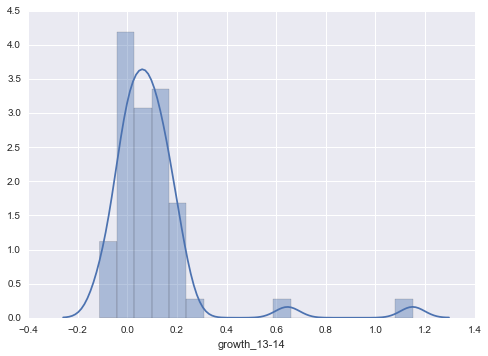

In [5]:
import seaborn as sns
sns.distplot(mortal['growth_13-14'])

In [6]:
mortal[mortal['growth_13-14']>.2] 

,State,2014Rate,2014Number,2014Range,2013Rate,2013Number,2013Range,Change,Significant,growth_13-14,growth_13-14_abs
0,ND,6.3,43.0,2.8 to 11.0,2.8,20.0,2.8 to 11.0,125.0,Significant,1.150000,23.0
17,AL,15.2,723.0,13.6 to 16.0,12.7,598.0,11.1 to 13.5,19.7,Significant,0.209030,125.0
20,ME,16.8,216.0,16.1 to 18.5,13.2,174.0,11.1 to 13.5,27.3,Significant,0.241379,42.0
30,NH,26.2,334.0,21.0 to 35.5,15.1,203.0,13.6 to 16.0,73.5,Significant,0.645320,131.0


4 states saw growth above 20% of alcohol related poisenings in this one timeframe

In [7]:
avg_poisening_growth = mortal['growth_13-14'].mean()
avg_poisening_growth #control for population?

0.09732178949409859

In [8]:
poison_growth = mortal['growth_13-14_abs'].sum()
poison_growth

3073.0

## Substance-related ER Visits

"Rate of emergency department visits with a principal diagnosis of  substance abuse ONLY, per 100,000 population, United States, 2007-2011"

In [9]:
er = pd.read_csv('NHQR/cleaned_sub_er.csv')
er = er.set_index('Unnamed: 0')
er= er.T
er = er.iloc[:,:-1]
er.head()

Unnamed: 0,Total,0-17,18-44,45-64,65-84,85 and over,Male,Female,First quartile (lowest income),Second quartile,...,Large central metropolitan,Large fringe metropolitan,Medium metropolitan,Small metropolitan,Micropolitan,Noncore,Northeast,Midwest,South,West
2011,540.0,88.6,785.5,798.1,205.3,98.2,743.2,342.0,662.8,515.2,...,657.2,473.9,592.7,462.6,419.4,384.7,"1,022.7",490.4,393.8,449.8
2010,510.2,87.3,734.7,754.6,197.4,102.8,704.3,321.4,692.4,499,...,627.1,454.7,524.5,454,398.1,392.3,990.9,424.3,385,421.4
2009,487.5,87.1,697.1,715.8,199.3,107,674.7,305.5,627.4,514.8,...,599.2,430.6,494.1,442.7,384.9,392.4,867.4,454.8,388.7,383.7
2008,457.7,91.9,661.3,648.6,188.4,120.1,628.7,291.6,586.3,477.9,...,514.3,422.4,490.5,448.7,378.3,368,788.9,407.2,377.9,374.7
2007,437.7,94.6,635.2,611.9,177.9,115.5,602.4,277.7,558.4,419.3,...,477.1,448.2,443.4,405.1,369.7,355.4,748.4,383.7,371,349.5


In [10]:
er.columns

Index([u'Total', u'0-17', u'18-44', u'45-64', u'65-84', u'85 and over',
       u'Male', u'Female', u'First quartile (lowest income)',
       u'Second quartile', u'Third quartile',
       u'Fourth quartile (highest income)', u'Large central metropolitan',
       u'Large fringe metropolitan', u'Medium metropolitan',
       u'Small metropolitan', u'Micropolitan', u'Noncore', u'Northeast',
       u'Midwest', u'South', u'West'],
      dtype='object', name=u'Unnamed: 0')

In [11]:
def er_clean(val):
    val = str(val)
    val = val.replace(",", "")
    return float(val)


er = er.applymap(er_clean)
er['year']=er.index
er['year'] = er['year'].apply(lambda x: int(x))
er = er.sort_values(by='year')
er.head()

Unnamed: 0,Total,0-17,18-44,45-64,65-84,85 and over,Male,Female,First quartile (lowest income),Second quartile,...,Large fringe metropolitan,Medium metropolitan,Small metropolitan,Micropolitan,Noncore,Northeast,Midwest,South,West,year
2007,437.7,94.6,635.2,611.9,177.9,115.5,602.4,277.7,558.4,419.3,...,448.2,443.4,405.1,369.7,355.4,748.4,383.7,371.0,349.5,2007
2008,457.7,91.9,661.3,648.6,188.4,120.1,628.7,291.6,586.3,477.9,...,422.4,490.5,448.7,378.3,368.0,788.9,407.2,377.9,374.7,2008
2009,487.5,87.1,697.1,715.8,199.3,107.0,674.7,305.5,627.4,514.8,...,430.6,494.1,442.7,384.9,392.4,867.4,454.8,388.7,383.7,2009
2010,510.2,87.3,734.7,754.6,197.4,102.8,704.3,321.4,692.4,499.0,...,454.7,524.5,454.0,398.1,392.3,990.9,424.3,385.0,421.4,2010
2011,540.0,88.6,785.5,798.1,205.3,98.2,743.2,342.0,662.8,515.2,...,473.9,592.7,462.6,419.4,384.7,1022.7,490.4,393.8,449.8,2011


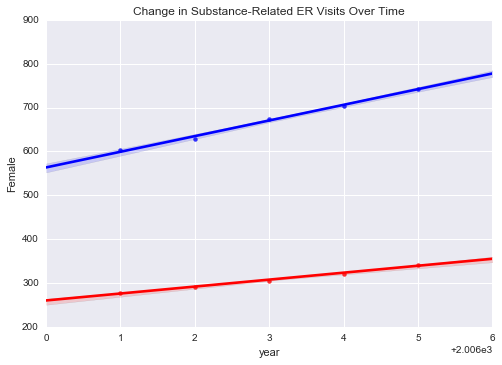

In [12]:
sns.regplot(data=er, x='year', y='Male', color='blue')
sns.regplot(data=er, x='year', y='Female', color='red')

plt.title("Change in Substance-Related ER Visits Over Time")


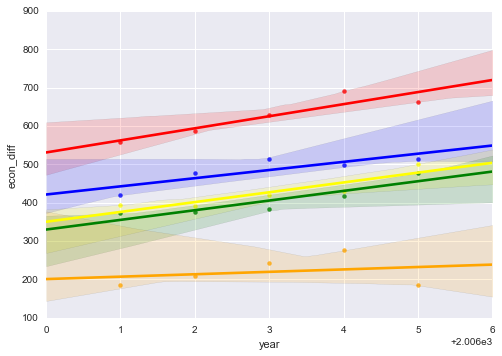

In [13]:
er['econ_diff'] = er['First quartile (lowest income)']- er['Fourth quartile (highest income)']

sns.regplot(data=er, x='year', y='First quartile (lowest income)', color='red')
sns.regplot(data=er, x='year', y='Second quartile', color='blue')
sns.regplot(data=er, x='year', y='Third quartile', color='yellow')
sns.regplot(data=er, x='year', y='Fourth quartile (highest income)', color='green')
sns.regplot(data=er, x='year', y='econ_diff', color='orange') #no departure, just upward trend among all classes

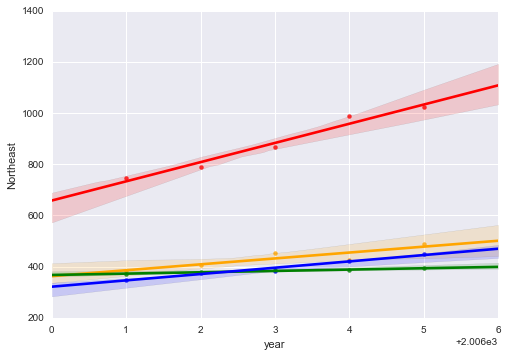

In [14]:
sns.regplot(data=er, x='year', y='Midwest', color='orange')
sns.regplot(data=er, x='year', y='South', color='green')
sns.regplot(data=er, x='year', y='West', color='blue')
sns.regplot(data=er, x='year', y='Northeast', color='red') #Northeast stands out in a major way on this plot


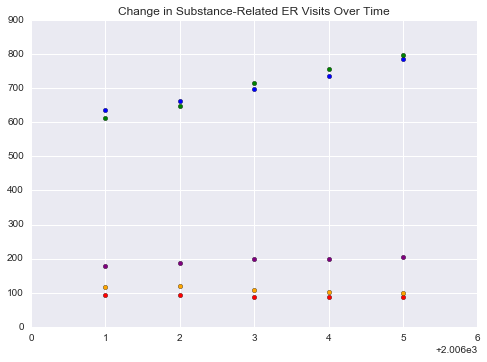

In [15]:
# sns.regplot(data=er, x='year', y='First quartile (lowest income)')

plt.scatter(er['year'], er['0-17'], c='red')
plt.scatter(er['year'], er['18-44'], c='blue')
plt.scatter(er['year'], er['45-64'], c='green')
plt.scatter(er['year'], er['65-84'], c='purple')
plt.scatter(er['year'], er['85 and over'], c='orange')



plt.title("Change in Substance-Related ER Visits Over Time")



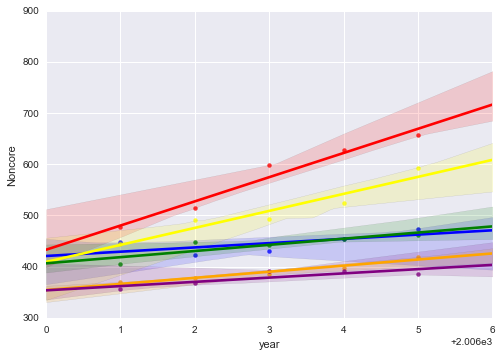

In [16]:

sns.regplot(data=er, x='year', y='Large central metropolitan', color='red')
sns.regplot(data=er, x='year', y='Large fringe metropolitan', color='blue')
sns.regplot(data=er, x='year', y='Medium metropolitan', color='yellow')
sns.regplot(data=er, x='year', y='Small metropolitan', color='green')
sns.regplot(data=er, x='year', y='Micropolitan', color='orange') #no departure, just upward trend among all classes
sns.regplot(data=er, x='year', y='Noncore', color='purple')



In [17]:
er.head()

Unnamed: 0,Total,0-17,18-44,45-64,65-84,85 and over,Male,Female,First quartile (lowest income),Second quartile,...,Medium metropolitan,Small metropolitan,Micropolitan,Noncore,Northeast,Midwest,South,West,year,econ_diff
2007,437.7,94.6,635.2,611.9,177.9,115.5,602.4,277.7,558.4,419.3,...,443.4,405.1,369.7,355.4,748.4,383.7,371.0,349.5,2007,186.0
2008,457.7,91.9,661.3,648.6,188.4,120.1,628.7,291.6,586.3,477.9,...,490.5,448.7,378.3,368.0,788.9,407.2,377.9,374.7,2008,209.8
2009,487.5,87.1,697.1,715.8,199.3,107.0,674.7,305.5,627.4,514.8,...,494.1,442.7,384.9,392.4,867.4,454.8,388.7,383.7,2009,243.1
2010,510.2,87.3,734.7,754.6,197.4,102.8,704.3,321.4,692.4,499.0,...,524.5,454.0,398.1,392.3,990.9,424.3,385.0,421.4,2010,275.7
2011,540.0,88.6,785.5,798.1,205.3,98.2,743.2,342.0,662.8,515.2,...,592.7,462.6,419.4,384.7,1022.7,490.4,393.8,449.8,2011,184.5


In [18]:
#http://wonder.cdc.gov/ucd-icd10.html pulled from CDC wonder
#http://wonder.cdc.gov/controller/datarequest/D76 - may be more ways to slice this file, this gets drug-related deaths

death = pd.read_csv('Underlying Cause of Death, 1999-2014.txt', delimiter="\t")
death.head()

,Notes,County,County Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval
0,NaN,"Autauga County, AL",1001.0,6850.0,809412.0,846.29336,826.25179,866.33493
1,NaN,"Baldwin County, AL",1003.0,26226.0,2691941.0,974.24126,962.45010,986.03242
2,NaN,"Barbour County, AL",1005.0,4646.0,447151.0,1039.02261,1009.14530,1068.89992
3,NaN,"Bibb County, AL",1007.0,3612.0,352254.0,1025.39645,991.95585,1058.83704
4,NaN,"Blount County, AL",1009.0,8602.0,882399.0,974.84245,954.24133,995.44356


In [19]:
8602.0	

8602.0

In [20]:
death.iloc[:,3:] = death.iloc[:,3:].apply(lambda x: x.replace(" ",""))
# death.iloc[:,3:] = death.iloc[:,3:].apply(lambda x: float(x))
# death.head() # can clean this up same way as other

death.columns

Index([u'Notes', u'County', u'County Code', u'Deaths', u'Population',
       u'Crude Rate', u'Crude Rate Lower 95% Confidence Interval',
       u'Crude Rate Upper 95% Confidence Interval'],
      dtype='object')

In [21]:
len(set(death['County Code'])) #there are about 3,000 counties in America, so this seems to have every state

3259

In [22]:
def state_extract(county):
    x = str(county)
    try:
        return x.split(", ")[1]
    except:
        return 'error'
        

death['State'] = death['County'].apply(state_extract)
# death['']

death['State'].value_counts()

TX       254
GA       159
VA       135
KY       120
MO       115
error    113
KS       105
IL       102
NC       100
IA        99
TN        95
NE        93
IN        92
OH        88
MN        87
MI        83
MS        82
OK        77
AR        75
WI        72
PA        67
FL        67
AL        67
SD        66
CO        64
LA        64
NY        62
CA        58
MT        56
WV        55
ND        53
SC        46
ID        44
WA        39
OR        36
NM        33
AK        31
UT        29
MD        24
WY        23
NJ        21
NV        17
ME        16
AZ        15
MA        14
VT        14
NH        10
CT         8
RI         5
HI         5
DE         3
DC         1
Name: State, dtype: int64

## Medicare Claims by State

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/OpioidMap.html

- really good source for relative states
Part_D_Opioid_Geographic_Data -- folder



## Price Purity data from table 2, 2013 Heroin Domestic Monitor Program.pdf

In [24]:
price_purity = pd.read_csv('drug_purityprice-09-14.csv')
price_purity=price_purity.iloc[:12, :6]
price_purity.head(15)

,Heroin soUrces,2009,2010,2011,2012,2013
0,souTh aMeriCa saMPles,341,346,323,375,334
1,souTh aMeriCa PerCenT Pure,33.6%,25.9%,31.1%,35.3%,35.1%
2,souTh aMeriCa PriCe Per MilligraM Pure,$1.28,$1.75,$1.18,$1.15,$1.04
3,MexiCo saMPles,322,309,296,339,293
4,MexiCo PerCenT Pure,24.7%,14.7%,16.8%,17.6%,16.9%
5,MexiCo PriCe Per MilligraM Pure,$1.11,$2.00,$1.35,$1.40,$1.12
6,allegeD MexiCo whiTe saMPles,N/A,N/A,N/A,N/A,64
7,allegeD MexiCo whiTe PerCenT Pure,N/A,N/A,N/A,N/A,35.5
8,allegeD MexiCo whiTe PriCe Per MilligraM Pure,N/A,N/A,N/A,N/A,$1.21
9,souThwesT asia saMPles,31,39,23,12,8


National use data from Behavioral Health Trends in the United States.pdf

In [25]:
use_age = pd.read_csv('heroin_behavior_use_data_table5a.csv')

use_age= use_age.iloc[0:4,1:]
use_age = use_age.T
use_age.reset_index(inplace=1)
use_age.columns = ['year', 'Total', 'Age_12-17', 'Age_18-25', 'Age_26+']

use_age.head()

,year,Total,Age_12-17,Age_18-25,Age_26+
0,2002,0.2,0.2,0.4,0.1
1,2003,0.1,0.1,0.3,0.1
2,2004,0.2,0.2,0.4,0.1
3,2005,0.2,0.1,0.5,0.1
4,2006,0.2,0.1,0.4,0.2


In [26]:
use_age = use_age.applymap(er_clean)

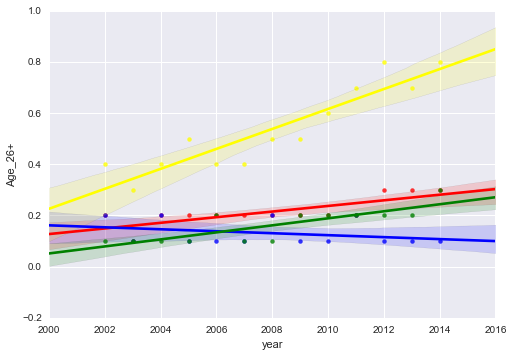

In [27]:
import seaborn as sns

sns.regplot(data=use_age, x='year', y='Total', color='red')
sns.regplot(data=use_age, x='year', y='Age_12-17', color='blue')
sns.regplot(data=use_age, x='year', y='Age_18-25', color='yellow')
sns.regplot(data=use_age, x='year', y='Age_26+', color='green')


In [28]:

# plt.scatter(use_age['year'], use_age['Total'], c='red')
# plt.scatter(use_age['year'], use_age['Age_12-17'], c='blue')
# plt.scatter(use_age['year'], use_age['Age_18-25'], c='green')
# plt.scatter(use_age['year'], use_age['Age_26+'], c='purple')

##### More potential data sources:
http://pdxscholar.library.pdx.edu/cgi/viewcontent.cgi?article=1020&context=sysc_fac

 ## Washington State Data: 
 http://adai.uw.edu/pubs/infobriefs/ADAI-IB-2015-01.pdf
 
 http://adai.uw.edu/wastate/wastate.htm

In [29]:
wash = pd.read_csv('wa_county_opioid.csv') #http://adai.uw.edu/pubs/infobriefs/ADAI-IB-2015-01.pdf
wash = wash.T
wash.reset_index(inplace=True)
wash = wash.T
wash.head(15)

,0,1,2,3,4,5,6
index,Asotin 30.6 112.8 268.8% 8.4 10.9 30.5% 24.1 1...,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Benton 26.3 50.3 91.0% 4.3 7.6 75.5% 11.8 49.9...,NaN,NaN,NaN,NaN,NaN,NaN
1,Chelan 42.4 66.6 57.1% 8.9 9.7 9.9% 24.6 61.5 ...,NaN,NaN,NaN,NaN,NaN,NaN
2,Clallam 53.0 301.4 468.5% 12.6 14.7 16.7% 20.7...,NaN,NaN,NaN,NaN,NaN,NaN
3,Clark 48.5 167.8 246.1% 5.0 7.9 57.9% 13.3 64....,NaN,NaN,NaN,NaN,NaN,NaN
4,Columbia 75.0 8.1 16.3 100.8%,NaN,NaN,NaN,NaN,NaN,NaN
5,Cowlitz 117.3 250.1 113.2% 10.3 17.9 73.9% 81....,NaN,NaN,NaN,NaN,NaN,NaN
6,Douglas 9.0 50.0 457.9% 5.2 9.9 91.0% 6.0 24.0...,NaN,NaN,NaN,NaN,NaN,NaN
7,Ferry 36.1 160.0 343.0% 0.0 0.0 78.6,NaN,NaN,NaN,NaN,NaN,NaN
8,Franklin 24.1 20.6 -14.6% 2.0 8.4 16.5 95.9%,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
def wash_clean(value, index):
    try:
        return value.split(" ")[index]
    except:
        return 'error'


wash[0]
wash['county'] = wash[0].apply(lambda x: x.split(" ")[0])
wash['public_tx_100k_02-04'] = wash[0].apply(lambda x: x.split(" ")[1])
wash['public_tx_100k_11-13'] = wash[0].apply(lambda x: x.split(" ")[2])
wash['0204-1113_tx_perc_change'] = wash[0].apply(lambda x: x.split(" ")[3])
wash['op_death_100k_02-04'] = wash[0].apply(lambda x: x.split(" ")[4])
wash['op_death_100k_11-13'] = wash[0].apply(lambda x: wash_clean(x, 5))
wash['0204-1113_death_perc_change'] = wash[0].apply(lambda x: wash_clean(x, 6))
wash['lab_100k_02-04'] = wash[0].apply(lambda x: wash_clean(x, 7))
wash['lab_100k_11-13'] = wash[0].apply(lambda x: wash_clean(x, 8))
wash['0204-1113_lab_perc_change'] = wash[0].apply(lambda x: wash_clean(x, 9))


# wash.head(21)
len(wash)



38

In [31]:
for i in wash:
    for o in wash[i]:
        if o == 'error':
            wash = wash.drop(i, axis=0)
        else:
            continue
#need to drop any row that contains error - check stackoverflow
wash

ValueError: labels ['op_death_100k_11-13'] not contained in axis

In [ ]:
wash

## Massachusetts County data: (really good data with .xls)

http://www.mass.gov/eohhs/gov/departments/dph/stop-addiction/current-statistics.html



In [ ]:
mass_op15 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/mass_county_opioid_2015.csv') 
#this is reports for Q1-3, 2015 all merged together in the csv
mass_op15.head()

here need to copy & paste 2013, 2014 data (need to pull from pdfs here:
http://www.mass.gov/eohhs/docs/dph/quality/drugcontrol/county-level-pmp/pmp-county-data-2014.pdf
                                           
then pull 2000-2014 data
http://www.mass.gov/eohhs/docs/dph/quality/drugcontrol/county-level-pmp/data-brief-apr-2015-overdose-county.pdf                

## Maine has pretty good data:

http://www.maine.gov/dhhs/samhs/osa/data/cesn/Heroin_Opioids_and_Other_Drugs_in_Maine_SEOW_Report.pdf



## Ohio also has good data here

http://www.healthy.ohio.gov/-/media/HealthyOhio/ASSETS/Files/injury-prevention/CountyDrugData2013.ashx?la=en
http://www.healthy.ohio.gov/-/media/HealthyOhio/ASSETS/Files/injury-prevention/Ohio-PDO-EpiAid-Trip-Report_Final-Draft_3_18_2016.ashx?la=en --- Table 1, and page 11 (fentanyl)

In [ ]:
ohio_op_county = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/ohio_opioid_02-2013.csv')
ohio_op_county

## New York State County Data Cleaning (lots of data, easy enough to import/ clean)


http://www.health.ny.gov/diseases/aids/general/opioid_overdose_prevention/docs/annual_report2015.pdf
http://www.health.ny.gov/diseases/aids/general/opioid_overdose_prevention/docs/annual_report2015.pdf


In [32]:
#^^lots more data to pull from these document for NY, including ER etc...

nys_demo = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/nys_demo_od_data.csv')
nys_demo.head()
#for by gender, and cause there are two sets of columns, 

,Sex,2008 (od_her),2009 (od_her),2010 (od_her),2011 (od_her),2012 (od_her),2013 (od_her),2008 (od_pk),2009 (od_pk),2010 (od_pk),2011 (od_pk),2012 (od_pk),2013 (od_pk)
0,Male 177 195 138 262 392 516 509 465 498 564 5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female 38 47 31 55 82 121 254 270 256 338 300 340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unintentional (X40-44) 202 220 149 281 454 607...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Undetermined (Y10-14) 9 21 19 32 19 28 71 68 8...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Suicide (X60-64) * * * * * * 73 80 70 71 71 87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
os.getcwd()
heroin_od_deaths_nys = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/heroin_od_deaths_nys.csv')
heroin_od_deaths_nys


,County,Mean Annual Frequency,"Crude Rate / 100,000 Residents","Age-Adjusted Rate / 100,000 Residents",Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Albany 6 1.9 1.9,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany * * *,NaN,NaN,NaN,NaN,NaN,NaN
2,Bronx 41 2.9 3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Broome 3 1.6** 1.8**,NaN,NaN,NaN,NaN,NaN,NaN
4,Cattaraugus * * *,NaN,NaN,NaN,NaN,NaN,NaN
5,Cayuga 1 1.5** 1.8**,NaN,NaN,NaN,NaN,NaN,NaN
6,Chautauqua 2 1.3** 1.5**,NaN,NaN,NaN,NaN,NaN,NaN
7,Chemung * * *,NaN,NaN,NaN,NaN,NaN,NaN
8,Chenango * * *,NaN,NaN,NaN,NaN,NaN,NaN
9,Clinton * * *,NaN,NaN,NaN,NaN,NaN,NaN


## CDC Wonder Data - Drug Related Mortality



In [44]:
# cdc_99_03 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death, 1999-2003.csv')
# cdc_04_09 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death 2004-2009.csv')



cdc_1999 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_1999.csv', delimiter='\t', encoding='utf-8')
cdc_2000 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2000.csv', delimiter='\t', encoding='utf-8')
cdc_2001 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2001.csv', delimiter='\t', encoding='utf-8')
cdc_2002 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2002.csv', delimiter='\t', encoding='utf-8')
cdc_2003 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2003.csv', delimiter='\t', encoding='utf-8')
cdc_2004 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2004.csv', delimiter='\t', encoding='utf-8')
cdc_2005 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2005.csv', delimiter='\t', encoding='utf-8')
cdc_2006 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2006.csv', delimiter='\t', encoding='utf-8')
cdc_2007 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2007.csv', delimiter='\t', encoding='utf-8')
cdc_2008 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2008.csv', delimiter='\t', encoding='utf-8')
cdc_2009 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2009.csv', delimiter='\t', encoding='utf-8')
cdc_2010 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2010.csv', delimiter='\t', encoding='utf-8')
cdc_2011 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2011.csv', delimiter='\t', encoding='utf-8')
cdc_2012 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2012.csv', delimiter='\t', encoding='utf-8')
cdc_2013 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2013.csv', delimiter='\t', encoding='utf-8')
cdc_2014_a = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2014_a-mississip.csv', delimiter='\t', encoding='utf-8')
cdc_2014_b = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/cdc_data/cdc_2014_missouri-z.csv', delimiter='\t', encoding='utf-8')

cdc_2014_a = cdc_2014_a[cdc_2014_a['Deaths'].isnull() == False]
cdc_2014_b = cdc_2014_b[cdc_2014_b['Deaths'].isnull() == False]
cdc_2014_b.head()


,Notes,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population,Crude Rate,% of Total Deaths
0,NaN,"Greene County, MO",29077.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,12.0,14902.0,Unreliable,0.031%
1,NaN,"Greene County, MO",29077.0,45-54 years,45-54,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,16.0,15574.0,Unreliable,0.042%
2,NaN,"Greene County, MO",29077.0,55-64 years,55-64,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,17.0,14926.0,Unreliable,0.044%
3,NaN,"Jackson County, MO",29095.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,11.0,26895.0,Unreliable,0.029%
4,NaN,"Jackson County, MO",29095.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,19.0,27497.0,Unreliable,0.049%


In [58]:
cdc_2014 = pd.concat([cdc_2014_a, cdc_2014_b], axis=1)


years = [2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999]

for ind, ex_df in enumerate([cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999]):
    ex_df['Year'] = years[ind]



cdc_2000 = cdc_2000[cdc_2000['Deaths'].isnull() == False]
cdc_2001 = cdc_2001[cdc_2001['Deaths'].isnull() == False]
cdc_2002 = cdc_2002[cdc_2002['Deaths'].isnull() == False]
cdc_2003 = cdc_2003[cdc_2003['Deaths'].isnull() == False]
cdc_2004 = cdc_2004[cdc_2004['Deaths'].isnull() == False]
cdc_2005 = cdc_2005[cdc_2005['Deaths'].isnull() == False]
cdc_2006 = cdc_2006[cdc_2006['Deaths'].isnull() == False]
cdc_2007 = cdc_2007[cdc_2007['Deaths'].isnull() == False]
cdc_2008 = cdc_2008[cdc_2008['Deaths'].isnull() == False]
cdc_2009 = cdc_2009[cdc_2009['Deaths'].isnull() == False]
cdc_2010 = cdc_2010[cdc_2010['Deaths'].isnull() == False]
cdc_2011 = cdc_2011[cdc_2011['Deaths'].isnull() == False]
cdc_2012 = cdc_2012[cdc_2012['Deaths'].isnull() == False]
cdc_2013 = cdc_2013[cdc_2013['Deaths'].isnull() == False]



cdc_99_14 = pd.concat([cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999], axis=0)
# cdc_99_03 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death, 1999-2003.csv', delimiter='"\t"')
cdc_99_14.columns

ValueError: Plan shapes are not aligned

In [49]:
cdc_99_14.describe()

,County Code,Deaths,County Code,Deaths,Year,County Code,Deaths,Year,County Code,Deaths,...,Year,County Code,Deaths,Year,County Code,Deaths,Year,County Code,Deaths,Year
count,882.000000,882.000000,752.000000,752.000000,882.0,1386.000000,1386.000000,1386.0,1386.000000,1386.000000,...,805.0,691.000000,691.000000,691.0,654.000000,654.000000,654.0,654.000000,654.000000,739.0
mean,13271.401361,22.223356,41410.893617,19.106383,2014.0,26819.338384,20.602453,2013.0,26819.338384,20.602453,...,2002.0,25132.089725,20.499276,2001.0,24365.928135,20.486239,2000.0,24365.928135,20.486239,1999.0
std,7728.123520,19.076731,6797.416424,11.212123,0.0,16086.908635,16.009743,0.0,16086.908635,16.009743,...,0.0,15745.378545,15.730831,0.0,16046.884676,16.124296,0.0,16046.884676,16.124296,0.0
min,1073.000000,10.000000,29077.000000,10.000000,2014.0,1073.000000,10.000000,2013.0,1073.000000,10.000000,...,2002.0,1073.000000,10.000000,2001.0,1073.000000,10.000000,2000.0,1073.000000,10.000000,1999.0
25%,NaN,NaN,NaN,NaN,NaN,12011.000000,12.000000,2013.0,12011.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27003.000000,15.000000,2013.0,27003.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,40143.000000,23.000000,2013.0,40143.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,28047.000000,190.000000,55133.000000,81.000000,2014.0,55133.000000,194.000000,2013.0,55133.000000,194.000000,...,2002.0,55079.000000,146.000000,2001.0,55133.000000,144.000000,2000.0,55133.000000,144.000000,1999.0


In [38]:
cdc_99_14[cdc_99_14.isnull()==True]

ValueError: cannot reindex from a duplicate axis

In [ ]:
import seaborn as sns





def pct_clean(string):
    string = str(string)
    x = string.replace("%", "")
    return float(x)


cdc_2010['pct_total_deaths'] = cdc_2010['% of Total Deaths'].apply(lambda x: pct_clean(x))

sns.distplot(cdc__99_14['pct_total_deaths'])                                             
# cdc_2010.isnull().sum()                         
                                       

In [ ]:
#duplicate this for each file

